In [1]:
# Basic setup & Import related modules 
import tensorflow as tf 
import numpy as np
import matplotlib.pyplot as plt
import keras 

import random, math

plt.rcParams['image.interpolation'] = 'nearest'
plt.rcParams['image.cmap'] = 'gray'

Using TensorFlow backend.


In [2]:
import utils, network, source_mut_operators 
utils = utils.GeneralUtils()
network = network.FCNetwork()
source_mut_opts = source_mut_operators.SourceMutationOperators()

(train_datas, train_labels), (test_datas, test_labels) = network.load_data()

print('train_datas shape:', train_datas.shape)
print('test_datas shape:', test_datas.shape)
print('train_labels shape:', train_labels.shape)
print('test_labels shape:', test_labels.shape)

mutation_ratios = [i*0.05 + 0.05 for i in range(20)]

train_datas shape: (5000, 784)
test_datas shape: (1000, 784)
train_labels shape: (5000, 10)
test_labels shape: (1000, 10)


In [3]:
# DR (Data Repetition)
normal_accs = []
mutant_accs = []
for mutation_ratio in mutation_ratios:
    model = network.create_normal_FC_model()
    (mutated_datas, mutated_results), mutated_model = source_mut_opts.DR_mut((train_datas, train_labels), model, mutation_ratio)

    model = network.compile_model(model)
    mutated_model = network.compile_model(mutated_model)
    
    trained_model = network.train_model(model, train_datas, train_labels)
    trained_mutated_model = network.train_model(mutated_model, mutated_datas, mutated_results)

    loss, acc = trained_model.evaluate(test_datas, test_labels, verbose=False)
    normal_accs.append(acc)
    mutant_loss, mutant_acc = trained_mutated_model.evaluate(test_datas, test_labels, verbose=False)
    mutant_accs.append(mutant_acc)
    

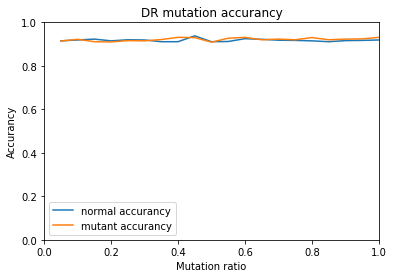

In [4]:
plt.axis([0, 1, 0, 1])
plt.plot(mutation_ratios, normal_accs)
plt.plot(mutation_ratios, mutant_accs)
plt.legend(['normal accurancy', 'mutant accurancy'], loc='lower left')
plt.title('DR mutation accurancy')
plt.xlabel('Mutation ratio')
plt.ylabel('Accurancy')
plt.show()

In [5]:
# LE (Label Error)
normal_accs = []
mutant_accs = []
for mutation_ratio in mutation_ratios:
    model = network.create_normal_FC_model()
    (mutated_datas, mutated_results), mutated_model = source_mut_opts.LE_mut((train_datas, train_labels), model, 0, 9, mutation_ratio)

    model = network.compile_model(model)
    mutated_model = network.compile_model(mutated_model)
    
    trained_model = network.train_model(model, train_datas, train_labels)
    trained_mutated_model = network.train_model(mutated_model, mutated_datas, mutated_results)

    loss, acc = trained_model.evaluate(test_datas, test_labels, verbose=False)
    normal_accs.append(acc)
    mutant_loss, mutant_acc = trained_mutated_model.evaluate(test_datas, test_labels, verbose=False)
    mutant_accs.append(mutant_acc)
    

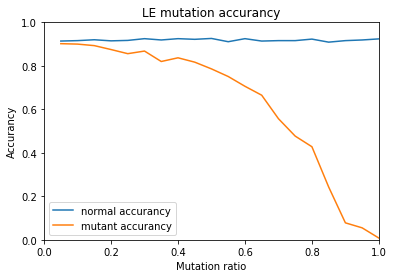

In [6]:
plt.axis([0, 1, 0, 1])
plt.plot(mutation_ratios, normal_accs)
plt.plot(mutation_ratios, mutant_accs)
plt.legend(['normal accurancy', 'mutant accurancy'], loc='lower left')
plt.title('LE mutation accurancy')
plt.xlabel('Mutation ratio')
plt.ylabel('Accurancy')
plt.show()

In [7]:
# DM (Data Missing)
normal_accs = []
mutant_accs = []
for mutation_ratio in mutation_ratios:
    model = network.create_normal_FC_model()
    (mutated_datas, mutated_results), mutated_model = source_mut_opts.DM_mut((train_datas, train_labels), model, mutation_ratio)

    model = network.compile_model(model)
    mutated_model = network.compile_model(mutated_model)
    
    trained_model = network.train_model(model, train_datas, train_labels)
    trained_mutated_model = network.train_model(mutated_model, mutated_datas, mutated_results)

    loss, acc = trained_model.evaluate(test_datas, test_labels, verbose=False)
    normal_accs.append(acc)
    mutant_loss, mutant_acc = trained_mutated_model.evaluate(test_datas, test_labels, verbose=False)
    mutant_accs.append(mutant_acc)
    

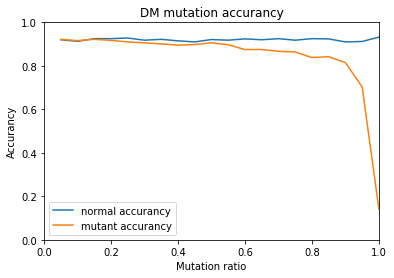

In [8]:
plt.axis([0, 1, 0, 1])
plt.plot(mutation_ratios, normal_accs)
plt.plot(mutation_ratios, mutant_accs)
plt.legend(['normal accurancy', 'mutant accurancy'], loc='lower left')
plt.title('DM mutation accurancy')
plt.xlabel('Mutation ratio')
plt.ylabel('Accurancy')
plt.show()

In [9]:
# DF (Data Shuffle)
normal_accs = []
mutant_accs = []
for mutation_ratio in mutation_ratios:
    model = network.create_normal_FC_model()
    (mutated_datas, mutated_results), mutated_model = source_mut_opts.DF_mut((train_datas, train_labels), model, mutation_ratio)

    model = network.compile_model(model)
    mutated_model = network.compile_model(mutated_model)
    
    trained_model = network.train_model(model, train_datas, train_labels)
    trained_mutated_model = network.train_model(mutated_model, mutated_datas, mutated_results)

    loss, acc = trained_model.evaluate(test_datas, test_labels, verbose=False)
    normal_accs.append(acc)
    mutant_loss, mutant_acc = trained_mutated_model.evaluate(test_datas, test_labels, verbose=False)
    mutant_accs.append(mutant_acc)
    

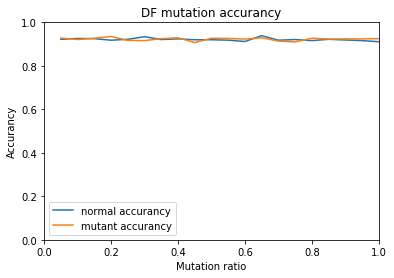

In [10]:
plt.axis([0, 1, 0, 1])
plt.plot(mutation_ratios, normal_accs)
plt.plot(mutation_ratios, mutant_accs)
plt.legend(['normal accurancy', 'mutant accurancy'], loc='lower left')
plt.title('DF mutation accurancy')
plt.xlabel('Mutation ratio')
plt.ylabel('Accurancy')
plt.show()

In [3]:
# DF (Data Shuffle), STD=0.1
STD = 0.1
normal_accs = []
mutant_accs = []
for mutation_ratio in mutation_ratios:
    model = network.create_normal_FC_model()
    (mutated_datas, mutated_results), mutated_model = source_mut_opts.NP_mut((train_datas, train_labels), model, mutation_ratio, STD=STD)

    model = network.compile_model(model)
    mutated_model = network.compile_model(mutated_model)
    
    trained_model = network.train_model(model, train_datas, train_labels)
    trained_mutated_model = network.train_model(mutated_model, mutated_datas, mutated_results)

    loss, acc = trained_model.evaluate(test_datas, test_labels, verbose=False)
    normal_accs.append(acc)
    mutant_loss, mutant_acc = trained_mutated_model.evaluate(test_datas, test_labels, verbose=False)
    mutant_accs.append(mutant_acc)
    

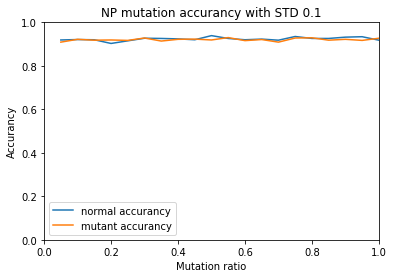

In [4]:
plt.axis([0, 1, 0, 1])
plt.plot(mutation_ratios, normal_accs)
plt.plot(mutation_ratios, mutant_accs)
plt.legend(['normal accurancy', 'mutant accurancy'], loc='lower left')
plt.title('NP mutation accurancy with STD 0.1')
plt.xlabel('Mutation ratio')
plt.ylabel('Accurancy')
plt.show()

In [5]:
# DF (Data Shuffle), STD=1
STD = 1
normal_accs = []
mutant_accs = []
for mutation_ratio in mutation_ratios:
    model = network.create_normal_FC_model()
    (mutated_datas, mutated_results), mutated_model = source_mut_opts.NP_mut((train_datas, train_labels), model, mutation_ratio, STD=STD)

    model = network.compile_model(model)
    mutated_model = network.compile_model(mutated_model)
    
    trained_model = network.train_model(model, train_datas, train_labels)
    trained_mutated_model = network.train_model(mutated_model, mutated_datas, mutated_results)

    loss, acc = trained_model.evaluate(test_datas, test_labels, verbose=False)
    normal_accs.append(acc)
    mutant_loss, mutant_acc = trained_mutated_model.evaluate(test_datas, test_labels, verbose=False)
    mutant_accs.append(mutant_acc)
    

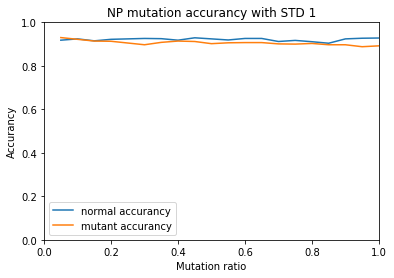

In [6]:
plt.axis([0, 1, 0, 1])
plt.plot(mutation_ratios, normal_accs)
plt.plot(mutation_ratios, mutant_accs)
plt.legend(['normal accurancy', 'mutant accurancy'], loc='lower left')
plt.title('NP mutation accurancy with STD 1')
plt.xlabel('Mutation ratio')
plt.ylabel('Accurancy')
plt.show()

In [7]:
# DF (Data Shuffle), STD=10
STD = 10
normal_accs = []
mutant_accs = []
for mutation_ratio in mutation_ratios:
    model = network.create_normal_FC_model()
    (mutated_datas, mutated_results), mutated_model = source_mut_opts.NP_mut((train_datas, train_labels), model, mutation_ratio, STD=STD)

    model = network.compile_model(model)
    mutated_model = network.compile_model(mutated_model)
    
    trained_model = network.train_model(model, train_datas, train_labels)
    trained_mutated_model = network.train_model(mutated_model, mutated_datas, mutated_results)

    loss, acc = trained_model.evaluate(test_datas, test_labels, verbose=False)
    normal_accs.append(acc)
    mutant_loss, mutant_acc = trained_mutated_model.evaluate(test_datas, test_labels, verbose=False)
    mutant_accs.append(mutant_acc)
    

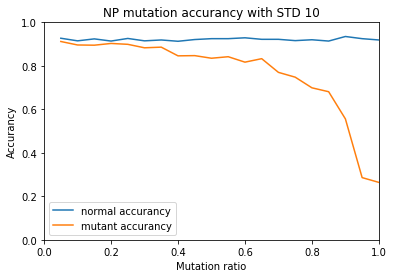

In [8]:
plt.axis([0, 1, 0, 1])
plt.plot(mutation_ratios, normal_accs)
plt.plot(mutation_ratios, mutant_accs)
plt.legend(['normal accurancy', 'mutant accurancy'], loc='lower left')
plt.title('NP mutation accurancy with STD 10')
plt.xlabel('Mutation ratio')
plt.ylabel('Accurancy')
plt.show()

In [9]:
# DF (Data Shuffle), STD=10
STD = 100
normal_accs = []
mutant_accs = []
for mutation_ratio in mutation_ratios:
    model = network.create_normal_FC_model()
    (mutated_datas, mutated_results), mutated_model = source_mut_opts.NP_mut((train_datas, train_labels), model, mutation_ratio, STD=STD)

    model = network.compile_model(model)
    mutated_model = network.compile_model(mutated_model)
    
    trained_model = network.train_model(model, train_datas, train_labels)
    trained_mutated_model = network.train_model(mutated_model, mutated_datas, mutated_results)

    loss, acc = trained_model.evaluate(test_datas, test_labels, verbose=False)
    normal_accs.append(acc)
    mutant_loss, mutant_acc = trained_mutated_model.evaluate(test_datas, test_labels, verbose=False)
    mutant_accs.append(mutant_acc)
    

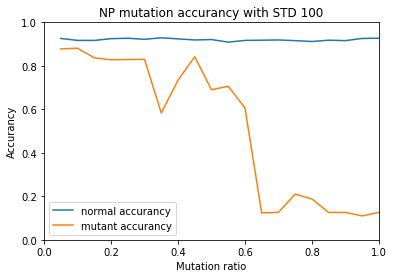

In [10]:
plt.axis([0, 1, 0, 1])
plt.plot(mutation_ratios, normal_accs)
plt.plot(mutation_ratios, mutant_accs)
plt.legend(['normal accurancy', 'mutant accurancy'], loc='lower left')
plt.title('NP mutation accurancy with STD 100')
plt.xlabel('Mutation ratio')
plt.ylabel('Accurancy')
plt.show()